## Capstone Project - Default of Credit Card Clients

Prepared by Debora Callegari

### Introduction

This Notebook presents the analysis of the dataset was taken from [Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset) and containing a history of 6 months of credit card statements payment information and identification of the variables that influence the likelihood of a default payment occurrence. The goal is to build a machine learning model that can learn from past default status in payments and try to predict which bills will be paid or not in the next month, for instance, October 2005.

### Imports

In [1]:
#Importing the necessary packages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

### Step 1: Data exploration

In [2]:
# Loading data from csv file
data = pd.read_csv("UCI_Credit_Card.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Setting the index for "ID" column
data.set_index('ID', inplace=True)

In [5]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# Exploring dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

In [7]:
print("The dimension of the data is: ", data.shape)

The dimension of the data is:  (30000, 24)


In [8]:
# Checking for NaN values in each column
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Considering the description of the dataset, this data refers to default payments based on demographic factors. There are 30,000 rows and 24 columns.

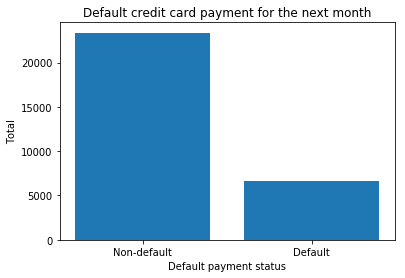

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [10]:
# plt.figure(figsize = (6,6))
plt.bar(data['default.payment.next.month'].value_counts().index, data['default.payment.next.month'].value_counts().values)
plt.xlabel('Default payment status')
plt.ylabel('Total')
plt.title('Default credit card payment for the next month')
plt.xticks((0,1), ('Non-default','Default'))
plt.show()

display(data['default.payment.next.month'].value_counts())

In [11]:
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [12]:
# Getting the frequency of default
data['default.payment.next.month'].sum() / len(data['default.payment.next.month'])

0.2212

Considering the plot above we can see that there are 30,000 clients over the months. And it shows that 23,364 clients will pay the amount for the next month and 6,636 will default the amount for the next month which represents around 78% and 22%, respectively. This data has a significant number of clients that will pay the bill amount. 

Also, it is possible to see that the data is imbalanced, in other words, the labels are not equally distributed. There are two classes: default and paid. The class 'default' will be considered as positive class and 'paid' will be considered as negative class.

### Step 2: Preparing and cleaning data

In [13]:
# Getting the columns' names
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [14]:
# Renaming columns in lowercase
data.rename(columns=lambda x: x.lower(), inplace=True)
data.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
# Renaming columns for better understading
new_data = data.rename(columns={'pay_0':'pay_1', 'default.payment.next.month':'default'})

In [16]:
new_data.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


The columns in the data have a standard nomenclature, except for those columns that I decided to rename. For the repayment status columns started with 'pay_0' and then jumped to 'pay_2', so I believe that it will be better to start with 'pay_1' instead of 'pay_0'. 

The last column for default payment contained `.` to separate the words, so I believe it will be important to put in the same standard method of other columns and the data will look and will work better.

#### 2.1. Looking amount of given credit column

In [17]:
new_data['limit_bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

   The range for the amount of given credit is between 10,000 to 1,000,000 (New Taiwan dollar) with the standard deviation considerable as great.

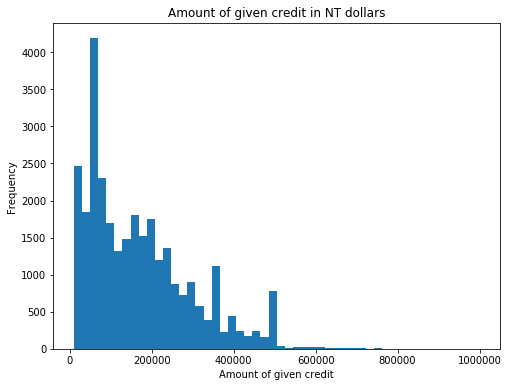

In [18]:
plt.figure(figsize = (8,6))
plt.hist(new_data["limit_bal"],bins=50)
plt.xlabel("Amount of given credit")
plt.ylabel("Frequency")
plt.title("Amount of given credit in NT dollars")
plt.show();

In [19]:
new_data[new_data['limit_bal'] == new_data['limit_bal'].max()]

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
ID,,,,,,,,,,,,,,,,,,,,,
2198,1000000.0,2,1,1,47,0,0,0,-1,0,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


Considering the example above, it is possible to see that the maximum limit of credit is NT$1,000,000 for the client with ID equal to 2198. The client is a woman and has a graduate school as education level. Also, she is 47 years old, married and will pay the amount for the next month.

#### 2.2. Looking some categorical columns

In [20]:
new_data[['sex', 'education', 'marriage']].describe()

,sex,education,marriage
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


##### 2.2.1. Sex column
For the 'sex' column the number `1` means 'male' and number `2` means 'female'.

In [21]:
# Getting value count for the 'sex' column
new_data["sex"].value_counts()

2    18112
1    11888
Name: sex, dtype: int64

The results above show us that around 60% of the total clients are female and around 40% are male.

##### 2.2.2. Education column
Based on the dataset information, for the 'education' column we can see how the values were distributed bellow:

|   EDUCATION LEVEL  |  NUMBER |
|--------------------|---------|
| graduate school    |  1 |
|   university       |  2 |
|high school         |  3 | 
| others             |  4 |  
| unknown            |  5 |
| unknown            |  6 | 

In [22]:
# Getting value count for the 'education' column
new_data["education"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

As we can see above that for value counts, suddenly it shows `0` as an index that was not described in the dataset. Also, the indexes `5` and `6` have the same description as 'unknown'. So, I decided to replace with `4` to `0`, `5` and `6` and assume that all of them receive the classification as 'others' since they were not described or unknown.

Finally, I dropped the index `0` because I can not make assumptions what they mean and only have 14 values so it will not affect my results in the future because represents only 0.04% of the total dataset.

In [23]:
# # Dropping rows that have value 0 for 'education' column
# new_data.drop(new_data.index[new_data['education'] == 0], inplace = True)

In [24]:
# Replacing 0, 5 and 6 with 4 at 'education' column 
new_data.replace({'education': {0: 4}}, inplace=True)
new_data.replace({'education': {5: 4}}, inplace=True)
new_data.replace({'education': {6: 4}}, inplace=True)

In [25]:
new_data["education"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

##### 2.2.3. Marriage column

The definition of marriage column is presented below:

    - Marital Status (1 = married; 2 = single; 3 = others)

In [26]:
# Getting value count for the 'marriage' column
new_data["marriage"].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

As we can see that `0` was not described at the dataset, I could not conclude what is the exact meaning for it. Also, the column that has the values equal to `3` was described as `others`, I could not conclude what is the exact meaning too, it can be divorced status or any other marital status. So I decided to drop those rows that contain values with a low occurrence that doesn’t affect the analysis.

In [27]:
# Dropping rows that have value equal to 0 or 3 for 'marriage' column
new_data.drop(new_data.index[new_data['marriage'] == 0], inplace = True)
new_data.drop(new_data.index[new_data['marriage'] == 3], inplace = True)

In [28]:
new_data["marriage"].value_counts()

2    15964
1    13659
Name: marriage, dtype: int64

#### 2.3. Looking age column 

In [29]:
new_data['age'].describe()

count    29623.000000
mean        35.401512
std          9.184117
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64

It is possible to see that the range of age is from 21 to 79 years and the average age is around 35 years old.

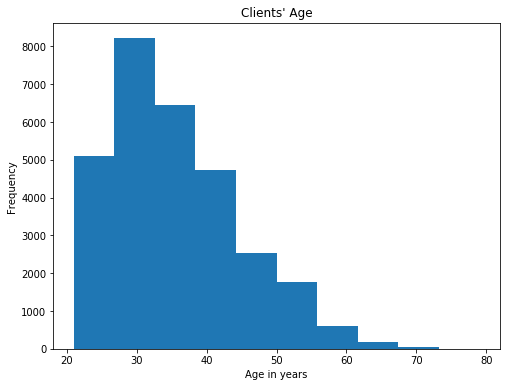

In [30]:
plt.figure(figsize = (8,6))
plt.hist(new_data["age"],bins=10)
plt.xlabel("Age in years")
plt.ylabel("Frequency")
plt.title("Clients' Age")
plt.show();

#### 2.4. Looking repayment status columns 

The repayment status columns specify if the client paid properly the payment or if the payment was delayed and for how long was the delayed.  
    
    PAY_1: Repayment status in September, 2005 
    PAY_2: Repayment status in August, 2005
    PAY_3: Repayment status in July, 2005
    PAY_4: Repayment status in June, 2005
    PAY_5: Repayment status in May, 2005
    PAY_6: Repayment status in April, 2005

The measurement scale for this columns is presented below: 
     
     -1 = pay duly; 1 = payment delay for one month;  2 = payment delay for two months, 3 = payment delay for three months, and so on.
     
    Note: For the value equal to 9, it means that the payment was delayed for nine months and above.

In [31]:
new_data[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].describe()           

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,29623.000000,29623.000000,29623.000000,29623.000000,29623.000000,29623.000000
mean,-0.018465,-0.135098,-0.168214,-0.222530,-0.267292,-0.292813
std,1.124708,1.197968,1.196804,1.168896,1.133896,1.150221
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Considering the results above, it is possible to see that there are values equal to `-2` and `0` as well. And the description showed that the values equal to `-1` represent that the payment was paid properly. So, I believe that replacing with `0` the values equal to `-2`and `-1` should make more sense and assume that the payments with values equal `0` were paid properly.

In [32]:
# Replacing -2 and -1 with 0 at repayment status columns

new_data.replace({'pay_1': {-2: 0, -1: 0}}, inplace=True)
new_data.replace({'pay_2': {-2: 0, -1: 0}}, inplace=True)
new_data.replace({'pay_3': {-2: 0, -1: 0}}, inplace=True)
new_data.replace({'pay_4': {-2: 0, -1: 0}}, inplace=True)
new_data.replace({'pay_5': {-2: 0, -1: 0}}, inplace=True)
new_data.replace({'pay_6': {-2: 0, -1: 0}}, inplace=True)

In [33]:
new_data[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].describe()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,29623.000000,29623.000000,29623.000000,29623.000000,29623.000000,29623.000000
mean,0.356412,0.319954,0.303447,0.258279,0.221821,0.226344
std,0.760607,0.801884,0.789620,0.759894,0.717355,0.714524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


#### 2.5. Looking amount of bill statement columns 

The bill statement columns specify the bill amount in the last six months, from April to September. 
    
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

In [34]:
new_data[['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,29623.000000,29623.000000,2.962300e+04,29623.000000,29623.000000,29623.000000
mean,51367.263343,49324.592445,4.717062e+04,43438.365189,40483.888330,39024.155825
std,73817.041344,71367.819177,6.954323e+04,64545.030993,60998.496767,59726.352985
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3526.000000,2967.500000,2.648500e+03,2317.000000,1760.500000,1256.500000
50%,22398.000000,21237.000000,2.011600e+04,19081.000000,18128.000000,17099.000000
75%,67497.000000,64252.000000,6.039700e+04,54862.500000,50497.000000,49423.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


For the negative values in the min row, I considered that the client overpaid the bill amount.

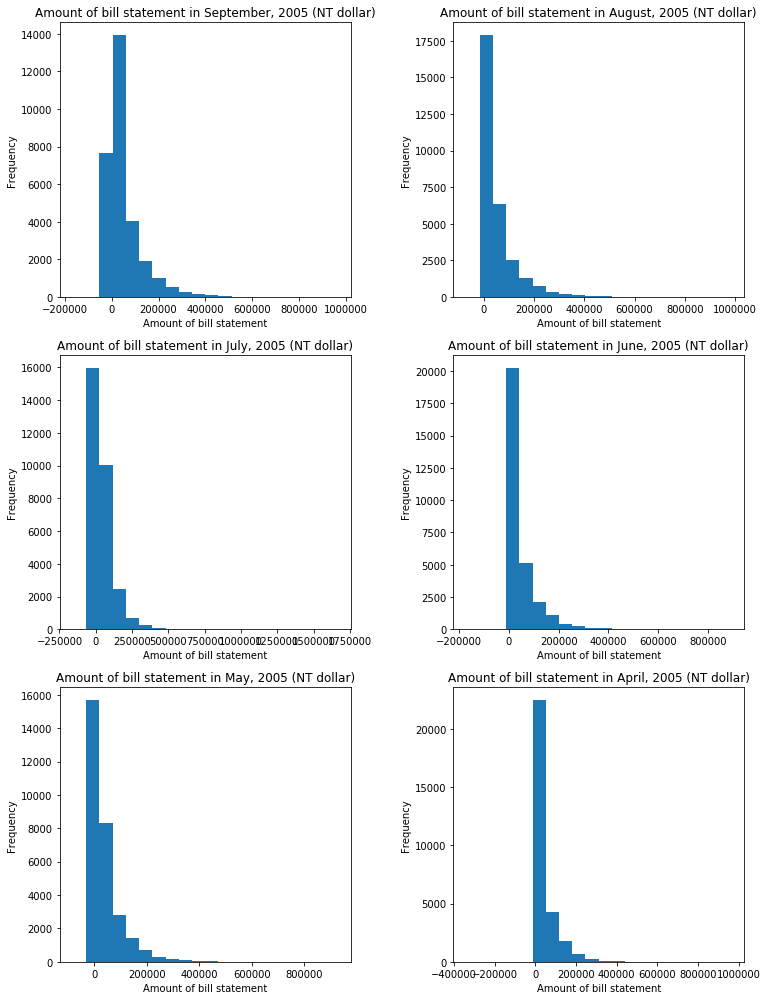

In [35]:
fig = plt.figure(figsize=(16, 14))

gridspec.GridSpec(3,2)

plt.subplot2grid((3,3), (0,0))
plt.hist(new_data["bill_amt1"],bins=20)
plt.xlabel("Amount of bill statement")
plt.ylabel("Frequency")
plt.title("Amount of bill statement in September, 2005 (NT dollar)")

plt.subplot2grid((3,3), (0,1))
plt.hist(new_data["bill_amt2"],bins=20)
plt.xlabel("Amount of bill statement")
plt.ylabel("Frequency")
plt.title("Amount of bill statement in August, 2005 (NT dollar)")

plt.subplot2grid((3,3), (1,0))
plt.hist(new_data["bill_amt3"],bins=20)
plt.xlabel("Amount of bill statement")
plt.ylabel("Frequency")
plt.title("Amount of bill statement in July, 2005 (NT dollar)")

plt.subplot2grid((3,3), (1,1))
plt.hist(new_data["bill_amt4"],bins=20)
plt.xlabel("Amount of bill statement")
plt.ylabel("Frequency")
plt.title("Amount of bill statement in June, 2005 (NT dollar)")

plt.subplot2grid((3,3), (2,0))
plt.hist(new_data["bill_amt5"],bins=20)
plt.xlabel("Amount of bill statement")
plt.ylabel("Frequency")
plt.title("Amount of bill statement in May, 2005 (NT dollar)")

plt.subplot2grid((3,3), (2,1))
plt.hist(new_data["bill_amt6"],bins=20)
plt.xlabel("Amount of bill statement")
plt.ylabel("Frequency")
plt.title("Amount of bill statement in April, 2005 (NT dollar)")

plt.tight_layout()
plt.show()

#### 2.6. Looking amount of previous payment columns 

The amount of previous payment columns show a history of 6 months of credit card statements payment information.
    
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

In [36]:
new_data[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,29623.000000,2.962300e+04,29623.000000,29623.000000,29623.000000,29623.000000
mean,5646.099315,5.905690e+03,5217.785437,4826.435439,4806.831145,5240.627249
std,15826.364173,2.205932e+04,16908.987034,15335.281148,15202.848008,17818.162571
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.320000e+02,390.000000,292.000000,256.000000,118.500000
50%,2109.000000,2.012000e+03,1820.000000,1500.000000,1500.000000,1500.000000
75%,5012.000000,5.000000e+03,4542.500000,4040.000000,4085.500000,4003.000000
max,505000.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000


For the values equal to zero in the min row, I considered that there is no payment made by the client.

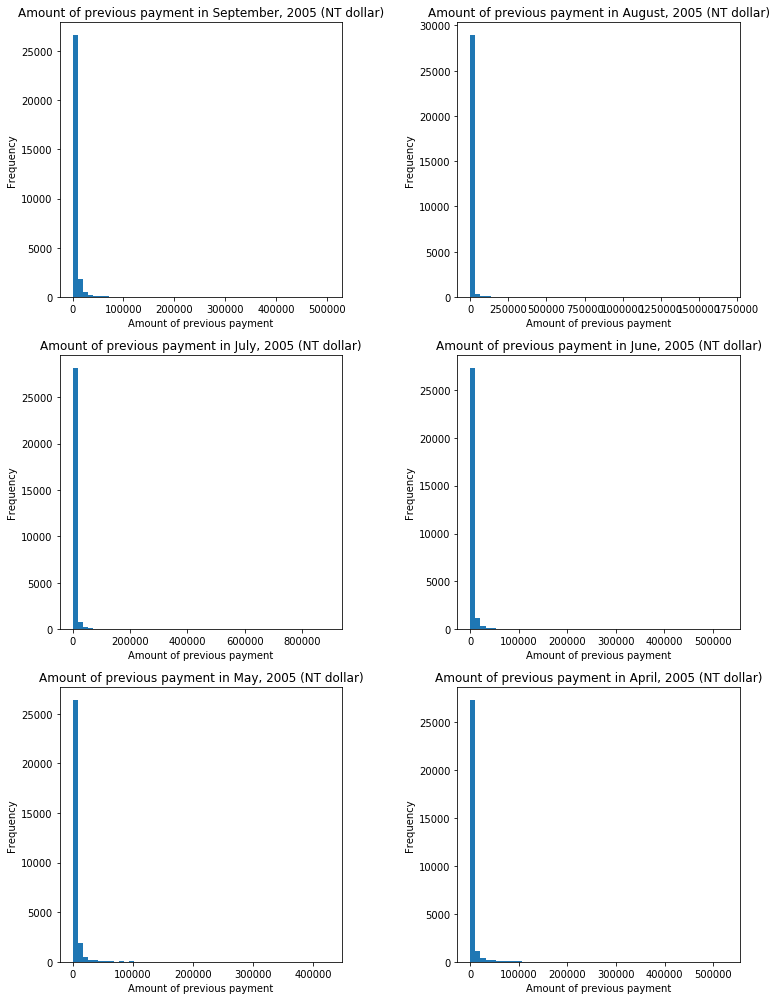

In [37]:
fig = plt.figure(figsize=(16, 14))

gridspec.GridSpec(3,2)

plt.subplot2grid((3,3), (0,0))
plt.hist(new_data["pay_amt1"],bins=50)
plt.xlabel("Amount of previous payment")
plt.ylabel("Frequency")
plt.title("Amount of previous payment in September, 2005 (NT dollar)")

plt.subplot2grid((3,3), (0,1))
plt.hist(new_data["pay_amt2"],bins=50)
plt.xlabel("Amount of previous payment")
plt.ylabel("Frequency")
plt.title("Amount of previous payment in August, 2005 (NT dollar)")

plt.subplot2grid((3,3), (1,0))
plt.hist(new_data["pay_amt3"],bins=50)
plt.xlabel("Amount of previous payment")
plt.ylabel("Frequency")
plt.title("Amount of previous payment in July, 2005 (NT dollar)")

plt.subplot2grid((3,3), (1,1))
plt.hist(new_data["pay_amt4"],bins=50)
plt.xlabel("Amount of previous payment")
plt.ylabel("Frequency")
plt.title("Amount of previous payment in June, 2005 (NT dollar)")

plt.subplot2grid((3,3), (2,0))
plt.hist(new_data["pay_amt5"],bins=50)
plt.xlabel("Amount of previous payment")
plt.ylabel("Frequency")
plt.title("Amount of previous payment in May, 2005 (NT dollar)")

plt.subplot2grid((3,3), (2,1))
plt.hist(new_data["pay_amt6"],bins=50)
plt.xlabel("Amount of previous payment")
plt.ylabel("Frequency")
plt.title("Amount of previous payment in April, 2005 (NT dollar)")

plt.tight_layout()
plt.show()

### Step 3: Using dummies for categorical columns

For this dataset, I decided to use dummies for categorical columns to specify better the values and results. So the process will be doing in two steps. The first step will be for the columns: sex, education and marriage. And the second step will be for the repayment status columns to determine when the payment happened duly or delay separately.

##### 3.1. Using get dummies for 'sex', 'education', 'marriage' columns

In [38]:
new_data.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [39]:
# Creating dummy variables for the categorical columns

categorical_columns = ['sex', 'education', 'marriage']

df_dummy_1 = pd.get_dummies(new_data, columns = categorical_columns)

In [40]:
df_dummy_1.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default', 'sex_1', 'sex_2',
       'education_1', 'education_2', 'education_3', 'education_4',
       'marriage_1', 'marriage_2'],
      dtype='object')

In [41]:
# Renaming columns for better understading
df_dummy_1.rename(columns={'sex_1':'male', 'sex_2':'female', 'education_1': 'grad_school', 
                         'education_2': 'university', 'education_3': 'high_school', 'education_4': 'educ_others',
                         'marriage_1': 'married', 'marriage_2': 'single'}, inplace=True)

In [42]:
df_dummy_1.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt6,default,male,female,grad_school,university,high_school,educ_others,married,single
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,0.0,1,0,1,0,1,0,0,1,0
2,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,2000.0,1,0,1,0,1,0,0,0,1
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,5000.0,0,0,1,0,1,0,0,0,1
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1000.0,0,0,1,0,1,0,0,1,0
5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,679.0,0,1,0,0,1,0,0,1,0


##### 3.2. Using get dummies for repayment status columns

In [43]:
# Creating dummy variables for repayment status columns

categorical_columns = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

df_dummy_2 = pd.get_dummies(df_dummy_1, columns = categorical_columns)

In [44]:
df_dummy_2.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_7,pay_5_8,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,1,0,0,0,0,0,0,0
2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0


### Step 4: Exploration using plots

#### 4.1. Default payment status by gender

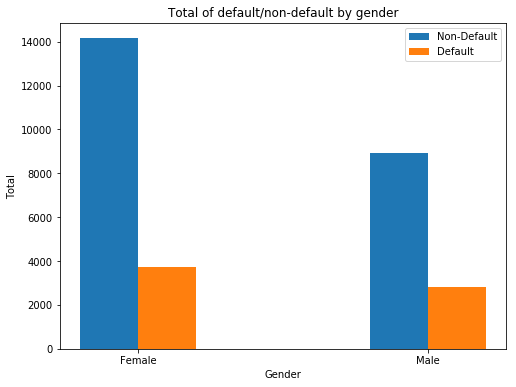

In [45]:
# Plotting total of status default payment by gender

wnd = df_dummy_2[df_dummy_2["default"]==0][df_dummy_2["male"]==0].shape[0]
wd = df_dummy_2[df_dummy_2["default"]==1][df_dummy_2["male"]==0].shape[0]
mnd = df_dummy_2[df_dummy_2["default"]==0][df_dummy_2["male"]==1].shape[0]
md = df_dummy_2[df_dummy_2["default"]==1][df_dummy_2["male"]==1].shape[0]

plt.figure(figsize = (8,6))
plt.bar(0, wnd, width=0.2, color='tab:blue', label='Non-Default')
plt.bar(0.2, wd, width=0.2, color='tab:orange', label='Default')
plt.bar(1, mnd, width=0.2, color='tab:blue')
plt.bar(1.2, md, width=0.2, color='tab:orange')
plt.xticks((0.1, 1.1), ('Female','Male'))
plt.xlabel("Gender")
plt.ylabel("Total")
plt.title("Total of default/non-default by gender")
plt.legend()
plt.show();

#### 4.2. Default payment status by marital status

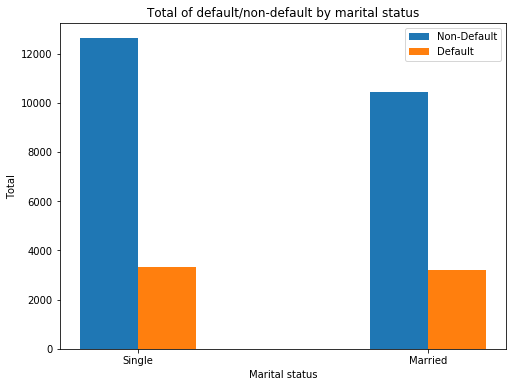

In [46]:
# Plotting total of status default payment by marital status

sind = df_dummy_2[df_dummy_2["default"]==0][df_dummy_2["married"]==0].shape[0]
sid = df_dummy_2[df_dummy_2["default"]==1][df_dummy_2["married"]==0].shape[0]
marrnd = df_dummy_2[df_dummy_2["default"]==0][df_dummy_2["married"]==1].shape[0]
marrd = df_dummy_2[df_dummy_2["default"]==1][df_dummy_2["married"]==1].shape[0]

plt.figure(figsize = (8,6))
plt.bar(0, sind, width=0.2, color='tab:blue', label='Non-Default')
plt.bar(0.2, sid, width=0.2, color='tab:orange', label='Default')
plt.bar(1, marrnd, width=0.2, color='tab:blue')
plt.bar(1.2, marrd, width=0.2, color='tab:orange')
plt.xticks((0.1, 1.1), ('Single', 'Married'))
plt.xlabel("Marital status")
plt.ylabel("Total")
plt.title("Total of default/non-default by marital status")
plt.legend()
plt.show();

#### 4.3. Default payment status by education

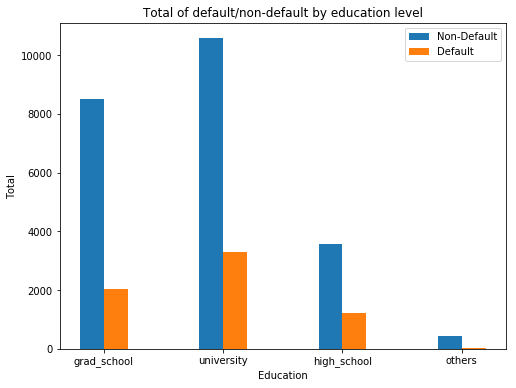

In [47]:
# Plotting total of status default payment by education

gradschond = df_dummy_2[df_dummy_2["default"]==0][df_dummy_2["grad_school"]==1].shape[0]
gradschod = df_dummy_2[df_dummy_2["default"]==1][df_dummy_2["grad_school"]==1].shape[0]

unind = df_dummy_2[df_dummy_2["default"]==0][df_dummy_2["university"]==1].shape[0]
unid = df_dummy_2[df_dummy_2["default"]==1][df_dummy_2["university"]==1].shape[0]

highschond = df_dummy_2[df_dummy_2["default"]==0][df_dummy_2["high_school"]==1].shape[0]
highschod = df_dummy_2[df_dummy_2["default"]==1][df_dummy_2["high_school"]==1].shape[0]

othersnd = df_dummy_2[df_dummy_2["default"]==0][df_dummy_2["educ_others"]==1].shape[0]
othersd = df_dummy_2[df_dummy_2["default"]==1][df_dummy_2["educ_others"]==1].shape[0]


plt.figure(figsize = (8,6))
plt.bar(0, gradschond, width=0.2, color='tab:blue', label='Non-Default')
plt.bar(0.2, gradschod, width=0.2, color='tab:orange', label='Default')
plt.bar(1, unind, width=0.2, color='tab:blue')
plt.bar(1.2, unid, width=0.2, color='tab:orange')
plt.bar(2, highschond, width=0.2, color='tab:blue')
plt.bar(2.2, highschod, width=0.2, color='tab:orange')
plt.bar(3, othersnd, width=0.2, color='tab:blue')
plt.bar(3.2, othersd, width=0.2, color='tab:orange')
plt.xticks((0.1, 1.1, 2.1, 3.1), ('grad_school', 'university', 'high_school', 'others'))
plt.xlabel("Education")
plt.ylabel("Total")
plt.title("Total of default/non-default by education level")
plt.legend()
plt.show();